In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Handling Missing Values

Based on the df.info() output, it seems that there are missing values in the "Income" column.   
Handling these missing values by filling them with the mean income.

In [6]:
df['Income'].fillna(df['Income'].mean(), inplace=True)

Checking for any remaining missing values

In [7]:
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


Converting the "Dt_Customer" column from the simple object data type to datetime object

In [8]:
print(df.dtypes['Dt_Customer'])

object


In [9]:
# Convert "Dt_Customer" column to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

C:\Users\shubh\AppData\Local\Temp\ipykernel_16672\3313683337.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [10]:
# After convert "Dt-Customer" column to datetime format.
print(df.dtypes['Dt_Customer'])

datetime64[ns]


# Normalization
Normalizing a dataset involves scaling the features to a range between 0 and 1

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Define the numerical features to be standardized
numerical_features = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Checking the normalized numerical features
print(df[numerical_features].head())

   Year_Birth    Income   Recency  MntWines  MntFruits  MntMeatProducts  \
0    0.621359  0.084832  0.585859  0.425318   0.442211         0.316522   
1    0.592233  0.067095  0.383838  0.007368   0.005025         0.003478   
2    0.699029  0.105097  0.262626  0.285332   0.246231         0.073623   
3    0.883495  0.037471  0.262626  0.007368   0.020101         0.011594   
4    0.854369  0.085065  0.949495  0.115874   0.216080         0.068406   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0         0.664093          0.334601      0.243094           0.200000   
1         0.007722          0.003802      0.016575           0.133333   
2         0.428571          0.079848      0.116022           0.066667   
3         0.038610          0.011407      0.013812           0.133333   
4         0.177606          0.102662      0.041436           0.333333   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
0         0.296296            

# Encoding Categorical Values
Categorical values encoded into numerical format to process them effectively.   
For this one-hot encoding is used.   
**Definition**:   
*One-hot encoding is a technique used to convert categorical variables into a
numerical format that can be provided to machine learning algorithms*

In [12]:
# Peform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Education', 'Marital_Status'])

# Check the encoded DataFrame
print(df_encoded.head())

     ID  Year_Birth    Income  Kidhome  Teenhome Dt_Customer   Recency  \
0  5524    0.621359  0.084832        0         0  2012-04-09  0.585859   
1  2174    0.592233  0.067095        1         1  2014-08-03  0.383838   
2  4141    0.699029  0.105097        0         0  2013-08-21  0.262626   
3  6182    0.883495  0.037471        1         0  2014-10-02  0.262626   
4  5324    0.854369  0.085065        1         0  2014-01-19  0.949495   

   MntWines  MntFruits  MntMeatProducts  ...  Education_Master  Education_PhD  \
0  0.425318   0.442211         0.316522  ...                 0              0   
1  0.007368   0.005025         0.003478  ...                 0              0   
2  0.285332   0.246231         0.073623  ...                 0              0   
3  0.007368   0.020101         0.011594  ...                 0              0   
4  0.115874   0.216080         0.068406  ...                 0              1   

   Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divor

# Removing Outliers

### Steps to handle outliers:
1. **Identify Outliers:**   
*Use statistical methods such as z-score or interquartile (IQR) to detect 
                      outliers in numerical features.*

2. **Remove or Transform Outliers:**    
*Once identified, you can choose to remove the outliers from the dataset or transform them using techniques such as winsorization or log transform.*

Step1: Identifying the Outliers

In [13]:
from scipy import stats

# Define the numerical features to check for outliers
numerical_features = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Calculate the z-scores for each numerical feature
z_scores = stats.zscore(df[numerical_features])

# Define a threshold for identifying outliers (e.g., z-score > 3 or < -3)
threshold = 3

# Find the indices of outliers based on the z-scores
outlier_indices = (z_scores > threshold).any(axis=1)

# Print the indices of outliers
print("Indices of outliers:", df.index[outlier_indices].tolist())
print(len(outlier_indices))


Indices of outliers: [9, 12, 21, 27, 40, 45, 49, 51, 53, 76, 90, 98, 102, 109, 111, 126, 140, 161, 164, 168, 179, 197, 198, 201, 203, 213, 214, 230, 240, 243, 249, 252, 266, 276, 287, 288, 292, 305, 336, 339, 345, 347, 360, 368, 392, 404, 419, 429, 432, 447, 456, 459, 461, 463, 470, 492, 497, 506, 523, 528, 537, 543, 546, 557, 559, 561, 586, 591, 617, 626, 634, 646, 655, 672, 687, 702, 715, 723, 753, 764, 766, 771, 774, 779, 780, 790, 803, 809, 812, 814, 817, 824, 825, 845, 846, 852, 855, 875, 895, 897, 905, 906, 914, 917, 921, 924, 926, 928, 934, 966, 981, 984, 987, 1010, 1016, 1031, 1040, 1042, 1050, 1052, 1060, 1075, 1089, 1100, 1111, 1133, 1147, 1156, 1157, 1161, 1168, 1179, 1190, 1199, 1213, 1245, 1253, 1259, 1265, 1266, 1278, 1280, 1288, 1298, 1300, 1311, 1313, 1325, 1328, 1333, 1342, 1355, 1358, 1413, 1421, 1444, 1446, 1451, 1476, 1480, 1484, 1488, 1490, 1492, 1495, 1503, 1506, 1507, 1508, 1513, 1521, 1524, 1525, 1526, 1528, 1542, 1552, 1569, 1572, 1589, 1591, 1601, 1612, 1622, 

Step2: Transforming the Outliers.   

*Transforming the outliers using winsorization, where extreme values are replace with less extreme values.*

In [14]:
from scipy.stats.mstats import winsorize

for feature in numerical_features:
  df[feature] = winsorize(df[feature], limits=(0.05, 0.05))

print(df[numerical_features].head())

   Year_Birth    Income   Recency  MntWines  MntFruits  MntMeatProducts  \
0    0.621359  0.084832  0.585859  0.425318   0.442211         0.316522   
1    0.592233  0.067095  0.383838  0.007368   0.005025         0.003478   
2    0.699029  0.105097  0.262626  0.285332   0.246231         0.073623   
3    0.883495  0.037471  0.262626  0.007368   0.020101         0.011594   
4    0.854369  0.085065  0.949495  0.115874   0.216080         0.068406   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0         0.648649          0.334601      0.243094           0.200000   
1         0.007722          0.003802      0.016575           0.133333   
2         0.428571          0.079848      0.116022           0.066667   
3         0.038610          0.011407      0.013812           0.133333   
4         0.177606          0.102662      0.041436           0.333333   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
0         0.296296            

# Feature Selection/Engineering

### Correlation Analysis

                           ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.001287  0.004357  0.002406 -0.002580   
Year_Birth           0.001287    1.000000 -0.215231  0.239880 -0.375084   
Income               0.004357   -0.215231  1.000000 -0.537322  0.044810   
Kidhome              0.002406    0.239880 -0.537322  1.000000 -0.036133   
Teenhome            -0.002580   -0.375084  0.044810 -0.036133  1.000000   
Recency             -0.047055   -0.021952  0.007076  0.009584  0.016051   
MntWines            -0.023875   -0.166891  0.743546 -0.514166  0.011020   
MntFruits           -0.001223   -0.015690  0.561956 -0.391032 -0.178446   
MntMeatProducts     -0.001822   -0.050823  0.732841 -0.467810 -0.263901   
MntFishProducts     -0.023328   -0.049318  0.571889 -0.407530 -0.210448   
MntSweetProducts    -0.005604   -0.022311  0.569137 -0.392731 -0.164511   
MntGoldProds        -0.022363   -0.069736  0.444360 -0.366649 -0.018467   
NumDealsPurchases   -0.03

C:\Users\shubh\AppData\Local\Temp\ipykernel_16672\4048015746.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


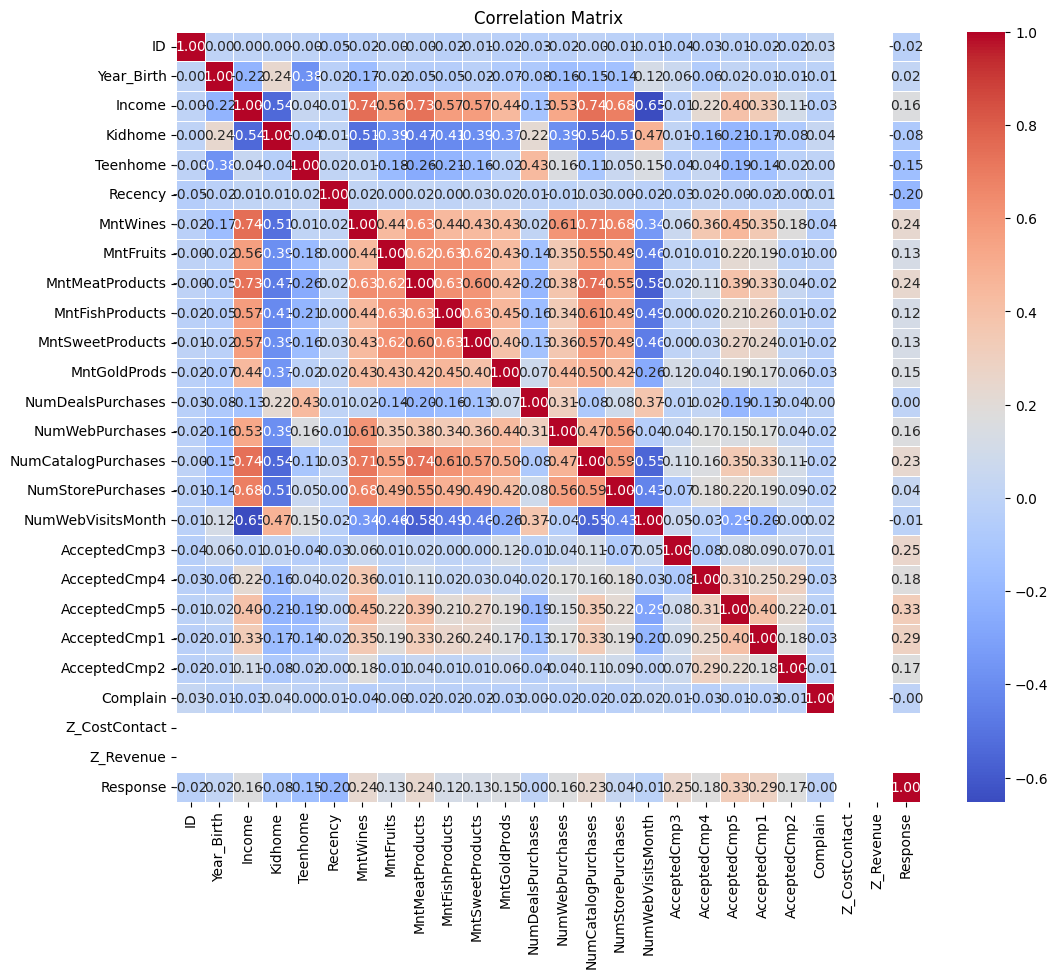

In [15]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Features that are helpful to identify high-value customers:
1. **Type of Products Purchased**: *Customers who purchase high-margin or premium products may be considered high-value.*

2. **Total Spending**: *The total amount spent by each customer on purchases.*   

3. **Purchase Frequency**: *How often a customer makes purchases within a given time period.*   

4. **Average Order Value (AOV)**: *The average amount spent per transaction by each customer.*   

5. **Recency of Purchase**: *How recently a customer made a purchase.*   

6. **Customer Lifetime Value (CLV)**: *The total value a customer brings to the business over their entire relationship.*   

7. **Income**: *The income level of the customer.*   

8. **Number of Purchases**: *The total number of purchases made by the customer.*   


### Calculation

 Step1: Calculate total revenue generated by each customer

In [16]:
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

Step2: Calculate total number of transactions made by each customer

In [17]:
df['Total_Transactions'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

Step3: Calculate average order value (AOV) for each customer

In [18]:
df['AOV'] = df['Total_Spending'] / df['Total_Transactions']

Step4: Calculate average customer lifespan (CL)

In [19]:
df['CL'] = df['Recency']

Step5: Calculate CLV

In [20]:
df['CLV'] = df['AOV'] * df['Total_Transactions'] * df['CL']

In [21]:
print(df[['Total_Spending', 'Total_Transactions', 'AOV', 'CL', 'CLV']].head())

   Total_Spending  Total_Transactions       AOV        CL       CLV
0        2.410394            1.125417  2.141778  0.585859  1.412150
1        0.043970            0.359931  0.122162  0.383838  0.016877
2        1.229627            1.203622  1.021606  0.262626  0.322932
3        0.102891            0.515100  0.199751  0.262626  0.027022
4        0.722065            1.087200  0.664151  0.949495  0.685597


In [22]:
# Calculate 'NumPurchases' as the total number of all types of purchases made by each customer
df['NumPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

from sklearn.ensemble import RandomForestRegressor

# Define features and target variable
features = ['Total_Spending', 'Total_Transactions', 'AOV', 'Recency', 'Income', 'NumPurchases']
target = 'CLV'

# Create a Random Forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(df[features], df[target])

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print(feature_importance_df)


              Feature  Importance
0      Total_Spending    0.628975
3             Recency    0.369478
2                 AOV    0.000572
4              Income    0.000505
1  Total_Transactions    0.000237
5        NumPurchases    0.000233


# K-means Clustering

### Using elbow to find the number of clusters requried

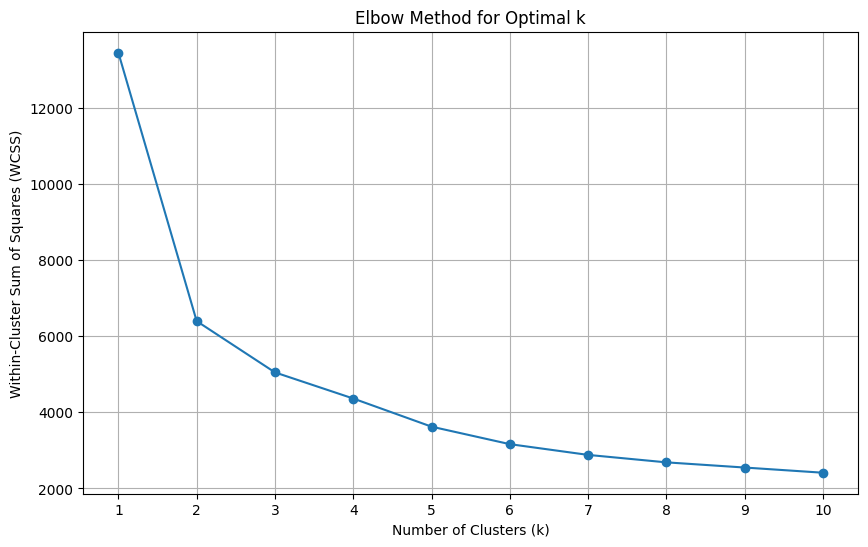

In [29]:
# Define the range of clusters to try
num_clusters = range(1, 11)

# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Calculate WCSS for each value of k
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(num_clusters)
plt.grid(True)
plt.show()

### From the above graph it is clear that the required number of clusters are 8. Because after 8 the graph not varies much.

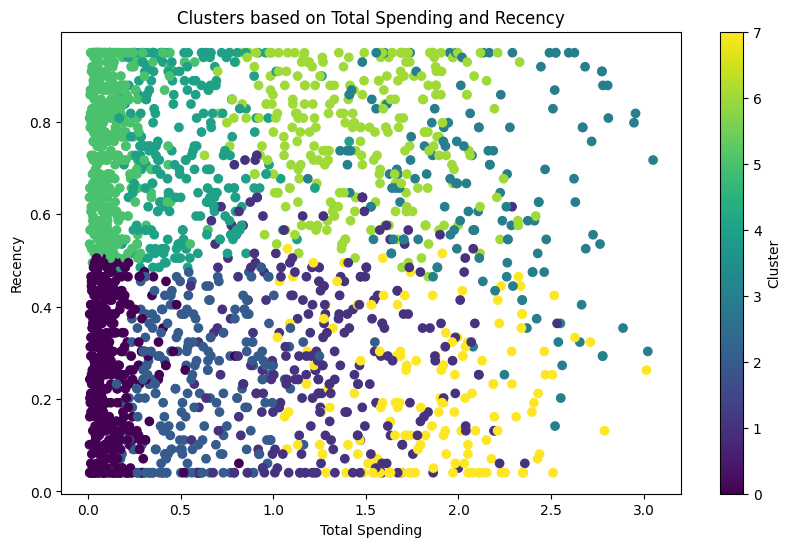

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
clustering_features = ['Total_Spending', 'Recency', 'AOV', 'Income', 'Total_Transactions', 'NumPurchases']

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[clustering_features])

# Apply K-means clustering
kmeans = KMeans(n_clusters=8, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Plot clusters based on 'Total_Spending' and 'Recency'
plt.figure(figsize=(10, 6))
plt.scatter(df['Total_Spending'], df['Recency'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Total Spending')
plt.ylabel('Recency')
plt.title('Clusters based on Total Spending and Recency')
plt.colorbar(label='Cluster')
plt.show()


# Interpretation and Profiling

### From the above output of the K-Means clustering algorithm,
  - **Cluster 0** consists of customers who visit the store `infrequently` and make `fewer` purchases.

  - **Cluster 1** comprises customers who visit the store `frequently` and make purchases of a `considerable` amount.

  - **Cluster 2** includes customers who visit the store `occasionally` and make `small` purchases.

  - **Cluster 3** represents customers who visit the store `very frequently` and make `high-value`purchases.

  - **Cluster 4** contains customers who visit the store `frequently` but make `relatively small` purchases.

  - **Cluster 5** encompasses customers who visit the store `frequently` but make `fewer` purchases.

  - **Cluster 6** consists of customers who visit the store `frequently` and make purchases of a `substantial` amount.

  - **Cluster 7** comprises customers who visit the store `frequently` and make purchases `ranging from a considerable amount to a high` amount.